# **Infrared Thermography Temperature**

**Dataset:** https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset

**Name:** Praveen Choudhary

**Prn :** 23070243065

In [ ]:
# !pip install ucimlrepo
# !pip install summarytools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Input
from keras.models import Model
from summarytools import dfSummary as pc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Fetch the dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

In [ ]:
# Extract features (X) and target (y)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets


In [ ]:
X.head(5)

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [ ]:
y.head(4)

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09


## **Summary About Dataset**

In [ ]:
pc(X)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Gender[object],1. Female2. Male,606 (59.4%)414 (40.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABM0lEQVR4nO3bwWnDQBRF0T9BmHgzgxC4GBWRYlPEdCOEZhEbbyaL9PA+5N1Twbe5CGz0ypwzAIUSEfeIuGUfYuQ953xmH5Fh2bbtq9a6Zh/iYoxxllK+HYNbaq3rvu/P1tor+5j/7rquz977ehzHLSL8YouIaK29Ho/HT/YxJu7ZB2T5yD4APogNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJBZIv5e6ss+xIH797yMMc7e+xrGL/UpjTHOiHhn35GBwYue7eClMOWDivuTzfYpk8F6yuc8q8tgO+Vzn9VlcJ/y8QtciD91IUNskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOM7ZTP8TNns57yOc/qMjB4YX8g8wsKW2rfwuH0SAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[object],1. 18-202. 21-253. 26-304. 31-405. 51-606. 21-307. 41-508. >60,534 (52.4%)355 (34.8%)67 (6.6%)31 (3.0%)11 (1.1%)10 (1.0%)9 (0.9%)3 (0.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADX0lEQVR4nO3dTU7bYBiF0ddWRJuJoygSS2hnLIBFsNguIgtg2D0ghAcNMEkHpVUlfhRKfO2456zgo3pk15YvNPv9viChHfsA/D/ERozYiBEbMWIjRmzENFW1rKqzsQ9y4h73+/1u7ENM3WKz2Vx1Xbce+yCnrO/726ZpvgnubYuu69aXl5e71Wp1P/ZhTtHd3d3n7Xa7vrm5Oasqsb1hUVW1Wq3uz8/Pf4x9mBO2HPsAp8ADAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERs6j69ZnM2Ac5Vf7tDrfo+/52u92uy2cy/6zv+9uqehz7HFPns/Dj8Fn4ARq/foGUOV/ZXG0mZraDFyOU6Znl4MUIZZrmPHjxdD0xXuoSIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzGzHLzM7eeZi9kOXoxQpsdn4cQYvBDjAYGY99xG3Zb4kIPXVdZKfNRB6yprJY7hPeuqWb0aIc8DAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERc9C6ylqJYzh4XWWtxEf5LJwY6ypiXruyuYpxdC8OXoxbGMKzwYtxC0N5bfBi3MLRealLjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMQ8G7wYtzCUFwcvxi0MwWfhxBi8EOMBgZi/b6NunQzqz7rKooqhtV3XrS8uLuppzjfHvzvKRLRVVcvl8mHsgzB/HhCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZi2qmq3230a+yDMX9v3/e319bVFFYPzWTgx1lXEuLIRY/BCjMELMQYvxHipS4zYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0Y6ypirKuIsUEgxrqKmN9XtnJVY2iLzWZzVVVlWcXQ2q7r1pZVJHjPRozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsRGzeBq6VBm7MDCfhRNj8EKM/7MR0zZN87Vpms9jH4T5a6vqS1X59QsMzm2UGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxLRV9b2qHsY+CPNn8EKM2ygxYiNGbMSIjRixESM2Yn4CewVAYIenIFsAAAAASUVORK5CYII="">",0(0.0%)
3,Ethnicity[object],1. White2. Asian3. Black or African-American4. Hispanic/Latino5. Multiracial6. American Indian or Alaskan Nat,506 (49.6%)260 (25.5%)143 (14.0%)57 (5.6%)50 (4.9%)4 (0.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqklEQVR4nO3dUUrjYBiF4a8SZLxJKYUupotwsbOI7qaU5kLFm87FOAMjYmNNTprO86zgR15+TcjBxel0Kki4m/oA/D/ERozYiBEbMYuqeqiq+6kPMjOvp9PpeepDzE2zXq8f27ZdTX2QOem67rBYLH4K7muatm1X2+32eblcvkx9mDk4Ho8/drvdar/f31eV2L6gqapaLpcvm83maerDzMjD1AeYIw8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEZMU/X7s5mpDzIXflaXa7quO+x2u1X5bKa3rusOVfU69Tnmxmfhl/FZ+AUWRsqkzOFmc4vciKsfvBiX3I6rHrwYl9yWOQxePCXfCC91iREbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsRFz1euqaz0Xl7n6dZUl0+2wQSDGuoqYMW82NxL/GG1dZRXFe6Osq6yi+MiY66qrfLplOl7qEiM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNmlHWVVRQfGW1dZRXFezYIxFhXEdP3ZnNL8W291lWWUgzh7LrKUoqh9F1XWUrxbV7qEiM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxZwcvxisMpdfgxXiFIfgsnBiDF2I8IBDT59eoX6EM4uy6yrKKoXy6rrKsYkh91lWWVQzCAwIxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEfPpusqyiiGdXVdZVjEUn4UTY11FzJ+brdxejK1Zr9ePVVVGLYztrm3b1du6aox/Awl/ec9GjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2Ypq39VSVBRUjs0EgxrqKGH+zESM2YsRGzC8nfSPIalnB1QAAAABJRU5ErkJggg=="">",0(0.0%)
4,T_atm[float64],Mean (sd) : 24.1 (1.3)min < med < max:20.2 < 24.0 < 29.1IQR (CV) : 1.3 (18.0),78 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtUlEQV

In [ ]:
pc(y)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,aveOralF[float64],Mean (sd) : 37.0 (0.4)min < med < max:35.8 < 36.9 < 39.6IQR (CV) : 0.3 (95.7),53 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACo0lEQVR4nO3dPW/aUBiG4fdAQIag4yCqZGPpkKFSh4ws/Qf5sV27dWDohpS1UzZE+IhwQ3CMu5QtJcUfwY97X/uLznAb+VhHOi5NUwOqrnHqBQD/4uzUCzjEOdcxs3bG8W2apk9FrgenU9lQnXOdwWBw673vZ5l/fHxcOOe+Ems9VDZUM2t77/uj0egpDMPNMYOr1SoYj8f9h4eHtpkRag1UOVQzMwvDcHN5efkrw2in8MXgZNhMQQKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQkLlD6VklSRJy8y8cy7rT3CetUJqGWoURa04jj8Ph8Nms9k86ojgHudZq6WWoW6327MgCLo3Nzebq6urxbHznGetnlqGund+fp71LKsZ51krhc0UJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJNT6VpQ8cl6oxmVqBSPUV+S9UI3L1IpHqK/Ic6Eal6mVg1APyHGhGpepFYzNFCSU+o/qnOuYWTvjuN/tdq0i1wNdpYXqnOsMBoNb730/y3wcx0GSJJ82m813M8t6nylqosx/1Lb3vj8ajZ7CMDx653x/f9+/u7vrvry8NMtYHLSUvpkKwzDThmSxWMhuSPgGW7w3Q83xnvlfvmPm/Qa7XC7XzrlvZnb07B8NM9udYNasxIfsYKh53jP375iz2exHloWt1+vAzCyKomA6nXbfazbv/Hw+7wVB0L2+vnYXFxfPx8wul8veZDL5MhwOP2SJPEmSVhRFH3u93s9GoxG/1+xezofsOU3Tv879BvHA+oCiKQOHAAAAAElFTkSuQmCC"">",0(0.0%)
2,aveOralM[float64],Mean (sd) : 37.0 (0.5)min < med < max:35.5 < 36.9 < 40.3IQR (CV) : 0.4 (72.7),70 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqElEQVR4nO3dMW/aQBiH8feFgEwSnYWoyJalY6UOGfkQ+bBduzVShsysnbJFQSQIF4pj3ImxSTnbxX/r+e0Xbnh0GOek18uyNKDteqfeAPAvzk69gfe4+8jMhpHLd2VZburcD06ntaG6+2gymdyGEMYx61er1dLdvxFrN7Q2VDMbhhDGs9lsk6bp9piFr6+vyf39/XixWAzNjFA7oM2hmplZmqbb6XT6K2LpqPbN4GT4MQUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJrf8XaqyiKAZmFtw99k9w+6pFOhlqlmWDPM+/Xl9f9/v9/lEXWg64fdUunQx1t9udJUlyfnNzs726uloeu57bV+3TyVAPLi4uYm9emXH7qlX4MQUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJjc6ZcveRmQ0jl4f9fj+ocz/Q1Vio7j6aTCa3IYRxzPo8z5OiKL5st9sfZhY71Awd0eSJOgwhjGez2SZN06PnkT4+Po7n8/n529tbv4nNfaTi0F8G/tas8RGTaZpGjXlcLpcnG/FYdegvA3/r1+lZqLGqDP1l4G8zCPUdsUN/i6IIxmNDrQi1Zjw2NINQa1b1seHu7m66WCw+ufsqdgtdjJxQGxLz2FD1NDbr7on8YagVXtrzwv5IVU5js1pO5J6Z7SPWHTR2mr8bapWX9ocX9s/Pzw8xG1uv14mZWZZlydPT0/n/WnvKzz6sjbXZbKJP5KIoBlmWfb68vPzZ6/XymM9/eXlZu/t3M4v5NvhdluVf1/0Ba4UwnetPc3wAAAAASUVORK5CYII="">",0(0.0%)


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a67e863357c3d5d321cd55d74b604844efd44512837a7ad30d064e3aea11402e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


## **Data Visualization**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


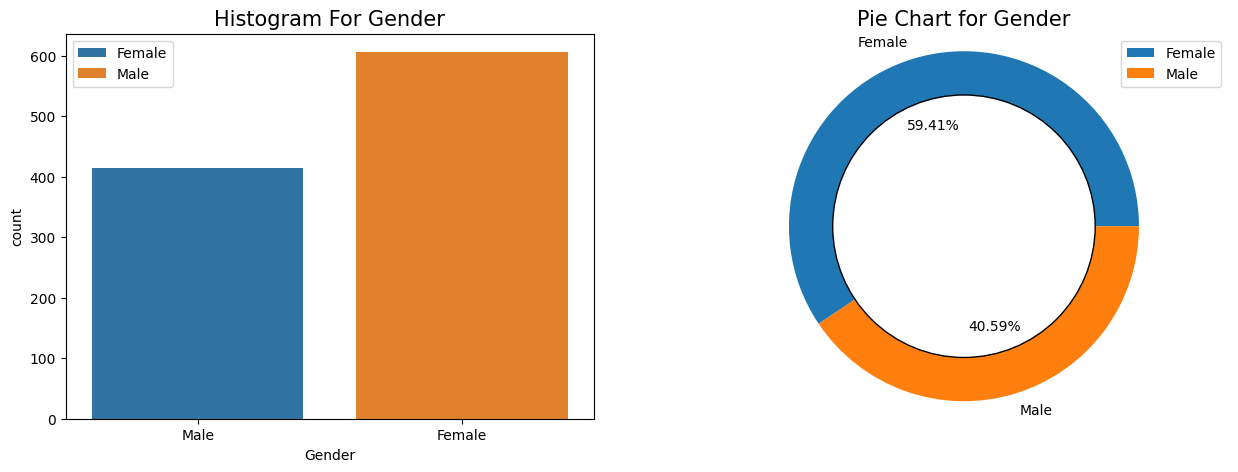

In [ ]:
# Plotting For Gender

labels = ['Female', 'Male']
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data=X, x='Gender', hue='Gender', alpha=1)
plt.legend(labels)
plt.title('Histogram For Gender',size=15)

plt.subplot(1, 2, 2)
female, male = X['Gender'].value_counts()
y1 = [female, male]
explode = [0, 0.0]
labels = ['Female', 'Male']
plt.pie(y1, labels=labels, explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Gender', size=15)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Label Encoding for Gender
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])


# One-Hot Encoding for Ethnicity and Age
X = pd.get_dummies(X, columns=['Ethnicity'], prefix='Ethnicity')

X = pd.get_dummies(X, columns=['Age'], prefix='Age')

<ipython-input-15-571bd8ddec93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = label_encoder.fit_transform(X['Gender'])


In [ ]:
X

,Gender,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,...,Ethnicity_Multiracial,Ethnicity_White,Age_18-20,Age_21-25,Age_21-30,Age_26-30,Age_31-40,Age_41-50,Age_51-60,Age_>60
0,1,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,...,False,True,False,False,False,False,False,True,False,False
1,0,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,...,False,False,False,False,False,False,True,False,False,False
2,0,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,...,False,True,False,False,True,False,False,False,False,False
3,0,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,...,False,False,False,False,True,False,False,False,False,False
4,1,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,35.0050,35.7525,...,False,False,False,True,False,False,False,False,False,False
1016,0,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,35.1975,35.9700,...,False,True,False,True,False,False,False,False,False,False
1017,0,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,35.9600,36.4100,...,False,False,True,False,False,False,False,False,False,False
1018,1,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,34.0100,35.7700,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Calculate mean value for 'Distance' column
mean_value = X['Distance'].mean()

# Replace NaN values in the 'Distance' with mean value
X['Distance'].fillna(mean_value, inplace=True)

<ipython-input-17-1b12b3d99804>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Distance'].fillna(mean_value, inplace=True)


In [ ]:
# Applying the method
check_nan = X.isnull().sum()

# printing the result
print(check_nan)

Gender                                         0
T_atm                                          0
Humidity                                       0
Distance                                       0
T_offset1                                      0
Max1R13_1                                      0
Max1L13_1                                      0
aveAllR13_1                                    0
aveAllL13_1                                    0
T_RC1                                          0
T_RC_Dry1                                      0
T_RC_Wet1                                      0
T_RC_Max1                                      0
T_LC1                                          0
T_LC_Dry1                                      0
T_LC_Wet1                                      0
T_LC_Max1                                      0
RCC1                                           0
LCC1                                           0
canthiMax1                                     0
canthi4Max1         

In [ ]:
X.describe()

,Gender,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,0.405882,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,...,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,0.491303,1.336338,13.071627,2.454074,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,...,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,0.000000,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,0.000000,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,...,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,0.000000,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,...,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,1.000000,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,...,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,1.000000,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,...,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your encoded data
scaler = MinMaxScaler()

# Fit and transform the data to scale it
X_scaled = scaler.fit_transform(X)

## **Model Building**

In [ ]:
# Assuming X_scaled.shape[1] gives you the correct number of features
input_features = X_scaled.shape[1]

# Define an Input layer to represent the input data
input_layer = Input(shape=(input_features,))

In [ ]:
input_layer

<KerasTensor shape=(None, 45), dtype=float32, sparse=None, name=keras_tensor>

In [ ]:
from keras.models import Model
from keras.layers import *

In [ ]:
from os import access

hidden1 = Dense(256,activation ='relu')(input_layer)
hidden2 = Dense(128,activation ='relu')(hidden1)
hidden3 = Dense(64,activation ='relu')(hidden2)

output1 = Dense(1,activation ='linear')(hidden3)
output2 = Dense(1,activation ='linear')(hidden3)

# Create the model
model = Model(inputs=input_layer, outputs=[output1, output2])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 45)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │         11,776 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │         32,896 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │          8,256 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │             65 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 53,058 (207.26 KB)

 Trainable params: 53,058 (207.26 KB)

 Non-trainable params: 0 (0.00 B)

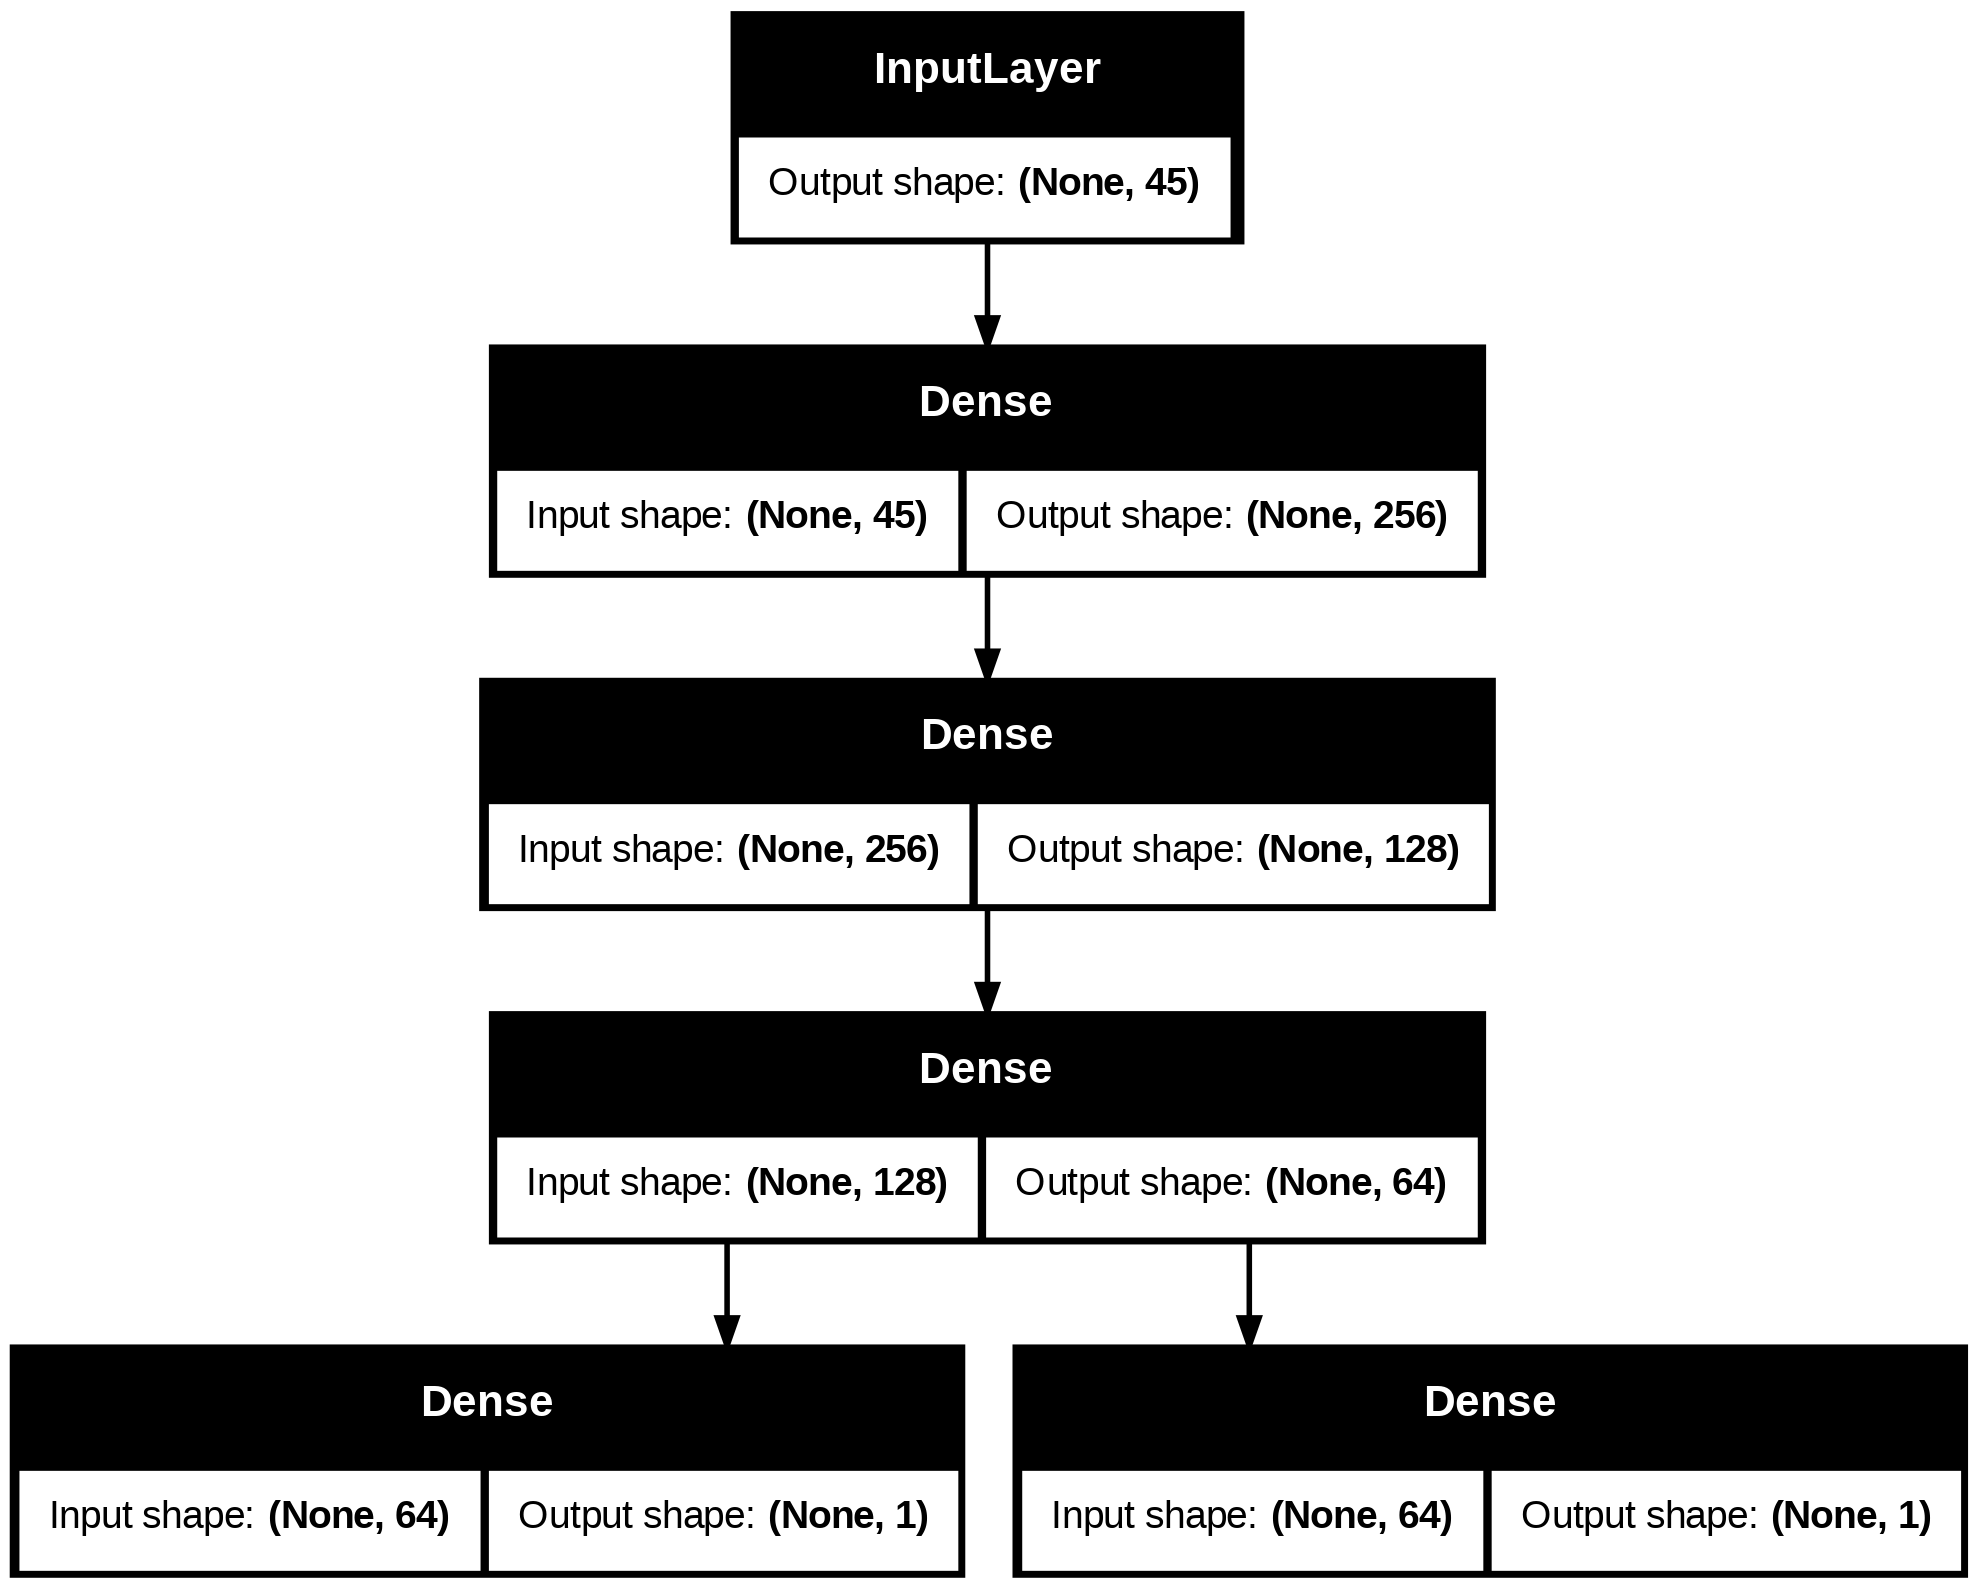

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 14.8 MB/s eta 0:00:00


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=['mse', 'mse'],  # Use 'mse' for both outputs (or change based on your need)
              metrics=['mae','mae'])  # Optional metrics like Mean Absolute Error

In [ ]:
y.head(2)

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19


In [ ]:
y1=y['aveOralF']
y2=y['aveOralM']

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,         # No. of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from epoch with the best validation loss
)


In [ ]:
# Traing the model
history = model.fit(X_scaled,[y1, y2],batch_size=32,epochs=500,verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - dense_3_mae: 35.5218 - dense_4_mae: 35.5683 - loss: 2537.8423 - val_dense_3_mae: 20.5332 - val_dense_4_mae: 21.2242 - val_loss: 888.0800
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - dense_3_mae: 12.0879 - dense_4_mae: 12.5431 - loss: 421.0042 - val_dense_3_mae: 7.1729 - val_dense_4_mae: 6.0218 - val_loss: 120.2481
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - dense_3_mae: 6.4333 - dense_4_mae: 5.9731 - loss: 114.6784 - val_dense_3_mae: 4.5292 - val_dense_4_mae: 4.4882 - val_loss: 71.2921
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - dense_3_mae: 4.8097 - dense_4_mae: 4.6815 - loss: 79.1778 - val_dense_3_mae: 4.1628 - val_dense_4_mae: 4.1335 - val_loss: 56.4919
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - dense_3_mae: 4.3193 - dense_4_mae: 4.2472 - loss: 61.2524 - val_dense_3_mae: 3.3225 - val_dense_4_mae: 3.3159 - val_loss: 39.0496
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - dense_3_mae: 3.4454

In [ ]:
history.history.keys()

dict_keys(['dense_3_mae', 'dense_4_mae', 'loss', 'val_dense_3_mae', 'val_dense_4_mae', 'val_loss'])

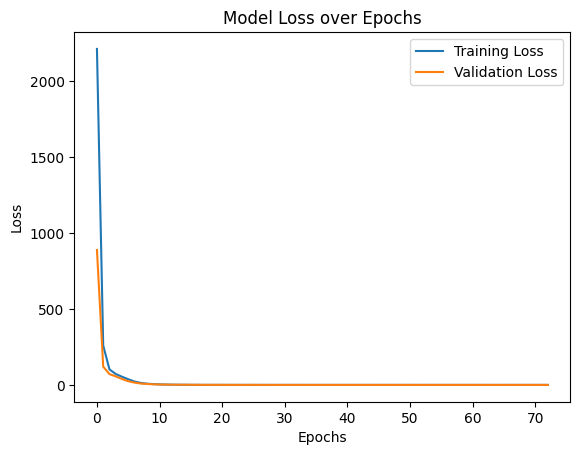

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss and val_loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding labels and legend
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


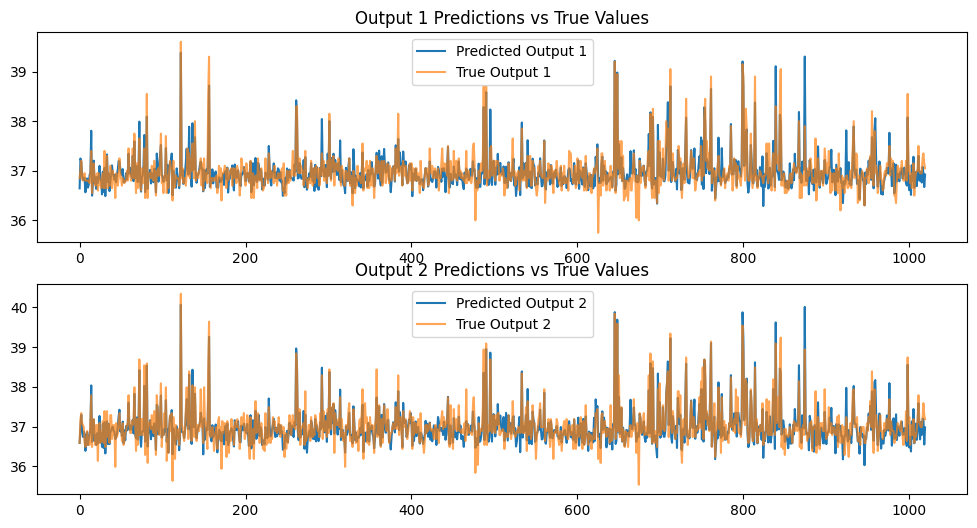

In [ ]:
# Make predictions
predictions1, predictions2 = model.predict(X_scaled)

# Plot predictions
import matplotlib.pyplot as plt

# Plot the predictions for output1
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(predictions1, label='Predicted Output 1')
plt.plot(y1, label='True Output 1', alpha=0.7)
plt.title('Output 1 Predictions vs True Values')
plt.legend()

# Plot the predictions for output2
plt.subplot(2, 1, 2)
plt.plot(predictions2, label='Predicted Output 2')
plt.plot(y2, label='True Output 2', alpha=0.7)
plt.title('Output 2 Predictions vs True Values')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tabulate import tabulate

# Calculate metrics for Output 1
metrics_output1 = {
    "R²": r2_score(y1, predictions1),
    "MAE": mean_absolute_error(y1, predictions1),
    "MSE": mean_squared_error(y1, predictions1),
    "Huber Loss": tf.keras.losses.Huber()(y1, predictions1).numpy(),
    "MAPE": tf.keras.losses.MeanAbsolutePercentageError()(y1, predictions1).numpy()
}

# Calculate metrics for Output 2
metrics_output2 = {
    "R²": r2_score(y2, predictions2),
    "MAE": mean_absolute_error(y2, predictions2),
    "MSE": mean_squared_error(y2, predictions2),
    "Huber Loss": tf.keras.losses.Huber()(y2, predictions2).numpy(),
    "MAPE": tf.keras.losses.MeanAbsolutePercentageError()(y2, predictions2).numpy()
}

# Calculate averages
average_metrics = {
    "R²": (metrics_output1["R²"] + metrics_output2["R²"]) / 2,
    "MAE": (metrics_output1["MAE"] + metrics_output2["MAE"]) / 2,
    "MSE": (metrics_output1["MSE"] + metrics_output2["MSE"]) / 2,
    "Huber Loss": (metrics_output1["Huber Loss"] + metrics_output2["Huber Loss"]) / 2,
    "MAPE": (metrics_output1["MAPE"] + metrics_output2["MAPE"]) / 2
}

# Convert the averages into a list for tabulate
table_avg = [[metric, f"{value:.4f}"] for metric, value in average_metrics.items()]

# Create a markdown table with averages
avg_table_md = tabulate(table_avg, headers=["Metric", "Average Value"], tablefmt="pipe")



In [ ]:
# Display the average table
print(avg_table_md)


| Metric     |   Average Value |
|:-----------|----------------:|
| R²         |          0.6987 |
| MAE        |          0.1793 |
| MSE        |          0.0585 |
| Huber Loss |          0.0292 |
| MAPE       |          0.4838 |
